<a href="https://colab.research.google.com/github/Abinayak03/Machine_learning/blob/main/IQR_outliers_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

You work for a fitness company and have gathered data on the fitness activities of 50 individuals using fitness trackers. The dataset is stored in an Excel file named "fitness_data.xlsx" and includes the following columns:

- **name:** Name of the person.
- **steps_taken:** The number of steps taken by individuals.
- **calories_burned:** The estimated calories burned by individuals.
- **sleep_duration(hours):** The number of hours of sleep individuals got on that day.
- **water_intake(ounces):** The amount of water individuals consumed.


**Import Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np

## Task1

1. Import the data from the "fitness_data.xlsx" Excel file.
2. Display the first few rows of the dataset to get an overview.
3. Calculate and display basic statistics (mean, median, min, max) for each column.


In [2]:
df=pd.read_excel('fitness_data.xlsx')
df.head(5)

,name,steps_taken,calories_burned,sleep_duration(hours),water_intake(ounces)
0,Akshay,10500,4500,7.5,80
1,Priya,9800,4200,7.2,75
2,Raj,11500,4800,7.0,90
3,Emily,12000,5000,7.8,85
4,Rohit,8900,4000,7.0,70


In [5]:
df.steps_taken.mean(),df.steps_taken.median(),df.steps_taken.min(),df.steps_taken.max()

(10316.0, 10250.0, 8000, 15000)

In [6]:
df.calories_burned.mean(),df.calories_burned.median(),df.calories_burned.min(),df.calories_burned.max()

(4418.0, 4400.0, 3700, 5500)

In [8]:
df = df.rename(columns={'sleep_duration(hours)': 'sleep_duration'})

In [9]:
df = df.rename(columns={'water_intake(ounces)': 'water_intake'})

In [10]:
df.sleep_duration.mean(),df.sleep_duration.median(),df.sleep_duration.min(),df.sleep_duration.max()

(7.396, 7.2, 4.0, 18.0)

In [11]:
df.water_intake.mean(),df.water_intake.median(),df.water_intake.min(),df.water_intake.max()

(79.6, 80.0, 30, 100)

## Task2:  Range and IQR

1. Calculate the range of "steps_taken".
2. Calculate the range of "calories_burned".
3. Calculate the Interquartile Range (IQR) for "sleep_duration(hours)".
4. Calculate the IQR for "water_intake(ounces)".

In [20]:
# Calculate the range of "steps_taken" for the entire week
range_steps=df['steps_taken'].max() - df['steps_taken'].min()
range_steps
# Calculate the range of "calories_burned" for the entire week
range_calories=df['calories_burned'].max() - df['calories_burned'].min()
range_calories
# Calculate the Interquartile Range (IQR) for "sleep_duration(hours)"


# Calculate the IQR for "water_intake(ounces)"
iqr_water=df['water_intake'].quantile(0.75)-df['water_intake'].quantile(0.25)
iqr_water

# Print the results


20.0

In [21]:
range_steps,range_calories,iqr_water,iqr_sleep

(7000, 1800, 20.0, 0.5)

In [19]:
iqr_sleep=df['sleep_duration'].quantile(0.75)-df['sleep_duration'].quantile(0.25)
iqr_sleep

0.5

## Task3: Box Plot for Steps Taken

- Create a box plot for the "steps_taken" column to visualize the distribution of daily steps taken by individuals. Interpret the box plot and identify any outliers.

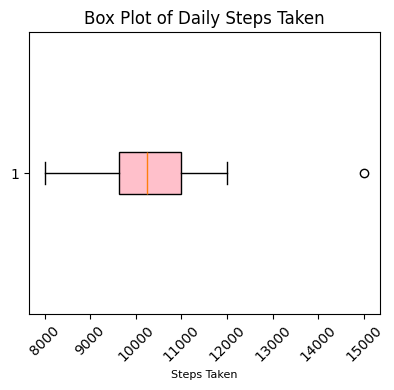

In [28]:

import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.boxplot(df['steps_taken'], vert=False, patch_artist=True, boxprops=dict(facecolor="pink"))
plt.title("Box Plot of Daily Steps Taken", fontsize=12)
plt.xlabel("Steps Taken", fontsize=8)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Observations

- Most individuals appear to have a median daily step count around 10,000 as indicated by the orange line within the box.
- The presence of an outlier at 15,000 indicates that there is at least one individual who took an exceptionally high number of steps. This could be due to various reasons, such as an unusually active day or a measurement error.


## Task4:

- Use the IQR method to identify and label outliers in the "sleep_duration(hours)" column.

In [33]:
#defininig the function
def outliers():
  q1,q3=df['sleep_duration'].quantile(0.25),df['sleep_duration'].quantile(0.75)
  iqr=q3-q1
  lower=q1-1.5*iqr
  upper=q3+1.5*iqr
  return lower,upper


In [34]:
#get the lower and upper limits
lower,upper=outliers()
print(lower,upper)

6.25 8.25


In [37]:
# Identify and label outliers
out=df[(df.sleep_duration>upper)|(df.sleep_duration<lower)]
out


# Display the outliers


,name,steps_taken,calories_burned,sleep_duration,water_intake
21,Elena,11700,4900,18.0,100
30,Siddharth,11300,4700,4.0,75
